In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


data = pd.read_csv(
    "data/tabernas_meteo_data.txt",
    delim_whitespace = True,
    usecols = (0,2,3,4,5),
    skiprows = 2,
    names = ['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates = ['DATE'],
    dayfirst = True,
    index_col = ['DATE'],
)

data



,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2
2016-12-09,13.6,9.5,11.2,1.8
...,...,...,...,...
2004-01-05,16.4,0.6,7.1,0.0
2004-01-04,16.2,-0.4,7.2,0.0
2004-01-03,15.1,0.8,7.9,0.0


In [11]:
data.dtypes

TMAX      float64
TMIN      float64
TMED      float64
PRECIP    float64
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2016-12-13 to 2004-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TMAX    4713 non-null   float64
 1   TMIN    4713 non-null   float64
 2   TMED    4713 non-null   float64
 3   PRECIP  4713 non-null   float64
dtypes: float64(4)
memory usage: 184.8 KB


In [14]:
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,4713.000000,4713.000000,4713.000000,4713.000000
mean,23.224761,9.676872,16.276321,0.650583
std,7.318656,6.263303,6.638529,3.273346
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


In [16]:
data[['TMAX','TMIN']].head(5)

,TMAX,TMIN
DATE,,
2016-12-13,14.6,4.0
2016-12-12,15.9,3.0
2016-12-11,16.9,5.0
2016-12-10,16.4,6.3
2016-12-09,13.6,9.5


In [21]:
np.mean(data.TMAX)
data.TMAX.mean()

23.224761298535967

In [22]:
data.iloc[1]

TMAX      15.9
TMIN       3.0
TMED       8.7
PRECIP     0.2
Name: 2016-12-12 00:00:00, dtype: float64

In [26]:
data.loc['2004-01-02']

TMAX      17.4
TMIN       5.7
TMED      10.6
PRECIP     0.0
Name: 2004-01-02 00:00:00, dtype: float64

In [30]:
data.loc[data.TMIN.isnull()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2015-12-31,NaN,NaN,NaN,NaN
2012-08-11,NaN,NaN,NaN,NaN
2012-08-10,NaN,NaN,NaN,NaN
2012-08-09,NaN,NaN,NaN,NaN
2012-08-08,NaN,NaN,NaN,NaN
2012-08-07,NaN,NaN,NaN,NaN
2012-08-06,NaN,NaN,NaN,NaN
2012-08-05,NaN,NaN,NaN,NaN
2012-08-04,NaN,NaN,NaN,NaN


In [28]:
print(data.PRECIP.mean())

23.224761298535967


In [31]:
data[data.PRECIP>data.PRECIP.mean()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-09,13.6,9.5,11.2,1.8
2016-12-04,11.8,10.1,10.9,23.8
2016-12-03,13.4,8.7,11.1,1.0
2016-12-01,13.6,9.2,11.1,3.2
2016-11-27,14.2,8.1,10.4,2.8
...,...,...,...,...
2004-02-27,12.5,4.2,8.8,2.0
2004-02-25,15.9,7.3,10.4,2.4
2004-02-24,14.3,6.0,9.7,1.0


In [32]:
#Agrupaciones
data['year']=data.index.year
data['month'] = data.index.month

monthly = data.groupby(by=['year','month'])

In [33]:
monthly.get_group((2016,3)).head(10)

,TMAX,TMIN,TMED,PRECIP,year,month
DATE,,,,,,
2016-03-31,22.5,6.9,14.5,0.0,2016,3
2016-03-30,26.7,5.7,16.4,0.0,2016,3
2016-03-29,24.2,5.3,14.9,0.0,2016,3
2016-03-28,23.1,5.3,14.6,0.0,2016,3
2016-03-27,22.7,9.0,16.2,0.0,2016,3
2016-03-26,24.7,6.7,16.5,0.0,2016,3
2016-03-25,25.5,3.4,14.6,0.0,2016,3
2016-03-24,19.0,2.8,11.0,0.0,2016,3
2016-03-23,17.8,3.6,10.8,0.2,2016,3


In [37]:
monthly_mean = monthly.mean()
monthly_mean.head(36)

TMAX       TMIN       TMED    PRECIP
year month                                           
2004 1      17.567742   3.432258   9.900000  0.025806
     2      16.017241   4.672414   9.803448  0.531034
     3      17.074194   6.187097  11.370968  2.619355
     4      19.016667   7.043333  13.190000  3.233333
     5      21.283871  10.519355  15.883871  1.019355
     6      30.756667  15.916667  23.323333  0.206667
     7      31.664516  17.912903  24.758065  0.006452
     8      33.483871  19.003226  26.241935  0.000000
     9      30.066667  16.323333  22.656667  0.020000
     10     26.022581  11.600000  18.451613  0.122581
     11     18.056667   4.766667  10.920000  0.366667
     12     14.500000   3.790323   8.800000  1.606452
2005 1      14.587097  -0.067742   6.425806  0.090323
     2      12.728571   0.775000   6.746429  1.821429
     3      17.635484   5.574194  11.332258  0.858065
     4      21.910000   8.163333  15.043333  0.073333
     5      26.770968  12.035484  19.732258  0.109677
     6      30.710000  15.550000  23.743333  0.033333
     7      33.445161  17.996774  26.206452  0.000000
     8      32.193333  17.976667  24.706667  0.040000
     9      27.803333  14.303333  20.756667  0.553333
     10     23.900000  11.480645  17.235484  0.187097
     11     17.053333   5.550000  10.913333  0.793333
     12     14.856667   2.730000   8.610000  0.306667
2006 1      12.110000   2.676667   7.226667  1.986667
     2      14.322222   3.351852   8.507407  0.607407
     3      20.722581   6.154839  13.296774  0.070968
     4      22.333333   9.586667  15.810000  1.960000
     5      25.280000  13.396667  19.156667  2.026667
     6      28.386207  15.206897  21.841379  0.351724
     7      33.900000  18.287097  26.216129  0.000000
     8      31.990323  17.719355  24.690323  0.000000
     9      28.633333  15.426667  21.653333  1.720000
     10     25.483871  12.516129  18.661290  0.232258
     11     19.343333   8.056667  13.353333  1.333333
     12     14.922581   3.219355   8.738710  0.322581

In [38]:
monthly_mean.reset_index().pivot(index='year', columns='month')

TMAX                                                         \
month         1          2          3          4          5          6    
year                                                                      
2004   17.567742  16.017241  17.074194  19.016667  21.283871  30.756667   
2005   14.587097  12.728571  17.635484  21.910000  26.770968  30.710000   
2006   12.110000  14.322222  20.722581  22.333333  25.280000  28.386207   
2007   16.487097  18.100000  18.390323  17.993103  25.767742  29.579310   
2008   16.293548  15.262069  20.148387  21.960000  23.200000  28.720000   
2009   13.609677  14.625000  18.019355  20.546667  26.083871  32.066667   
2010   13.838710  23.364286  16.100000  20.033333  24.403226  28.783333   
2011   14.258065  17.007143  16.212903  22.090000  24.145161  29.216667   
2012   15.796774  14.134483  18.522581  21.576667  27.138710  32.576667   
2013   16.919355  15.725000  18.567742  21.280000  23.425806  27.976667   
2014   16.506452  17.542857  18.809677  24.886667  25.112903  29.033333   
2015   15.819355  14.014286  18.793548  20.103333  27.174194  29.250000   
2016   17.541935  17.251724  18.906452  21.500000  24.632258  30.540000   

                                                   ...    PRECIP            \
month         7          8          9          10  ...        3         4    
year                                               ...                       
2004   31.664516  33.483871  30.066667  26.022581  ...  2.619355  3.233333   
2005   33.445161  32.193333  27.803333  23.900000  ...  0.858065  0.073333   
2006   33.900000  31.990323  28.633333  25.483871  ...  0.070968  1.960000   
2007   32.551613  31.764516  26.806667  21.919355  ...  0.625806  1.248276   
2008   32.596774  32.380645  27.343333  21.548387  ...  0.464516  0.120000   
2009   34.964516  32.367742  26.363333  25.945161  ...  1.425806  0.720000   
2010   33.070968  33.067742  28.726667  23.980645  ...  2.548387  0.486667   
2011   32.977419  33.687097  28.870000  24.216129  ...  1.012903  0.993333   
2012   32.880645  35.754545  28.106667  23.506452  ...  0.025806  0.013333   
2013   31.841935  31.716129  28.016667  26.603226  ...  1.141935  0.373333   
2014   32.154839  32.645161  29.603333  25.287097  ...  0.122581  0.013333   
2015   35.174194  32.203226  27.966667  23.664516  ...  1.374194  1.080000   
2016   32.180645  30.929032  29.016667  24.567742  ...  0.167742  0.126667   

                                                                             \
month        5         6         7         8         9         10        11   
year                                                                          
2004   1.019355  0.206667  0.006452  0.000000  0.020000  0.122581  0.366667   
2005   0.109677  0.033333  0.000000  0.040000  0.553333  0.187097  0.793333   
2006   2.026667  0.351724  0.000000  0.000000  1.720000  0.232258  1.333333   
2007   0.251613  0.000000  0.000000  0.070968  2.133333  2.051613  0.380000   
2008   1.503226  0.093333  0.283871  0.000000  2.146667  3.296774  0.646667   
2009   0.103226  0.020000  0.000000  0.077419  1.306667  0.090323  0.233333   
2010   0.367742  0.853333  0.000000  0.032258  0.146667  0.677419  1.546667   
2011   1.606452  0.080000  0.000000  0.077419  0.573333  0.141935  1.293333   
2012   0.000000  0.006667  0.000000  0.000000  2.233333  0.787097  2.173333   
2013   0.574194  0.000000  0.000000  0.800000  0.673333  0.083871  0.673333   
2014   0.051613  0.580000  0.000000  0.000000  1.240000  0.664516  0.633333   
2015   0.103226  0.113333  0.012903  0.006452  1.160000  1.322581  0.633333   
2016   0.425806  0.006667  0.000000  0.032258  0.313333  0.567742  1.680000   

                 
month        12  
year             
2004   1.606452  
2005   0.306667  
2006   0.322581  
2007   1.280000  
2008   0.000000  
2009   3.503226  
2010   1.877419  
2011   0.458065  
2012   0.058065  
2013   0.683871  
2014   0.419355  
2015   0.058065  
2016   2.369231  

[13 rows

Text(0.5, 1.0, 'Mi primer grafico de temperaturas')

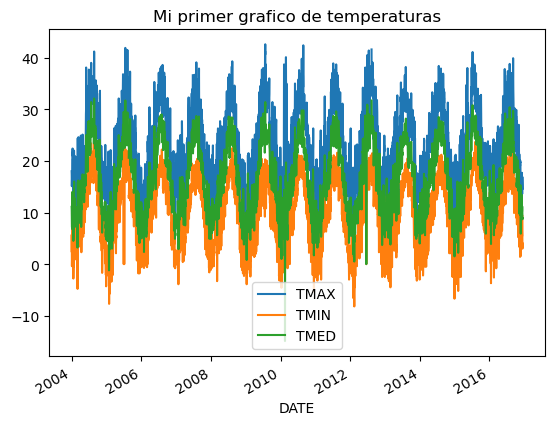

In [41]:
data.plot(y =['TMAX', 'TMIN', 'TMED'])
plt.title("Mi primer grafico de temperaturas")

<AxesSubplot: >

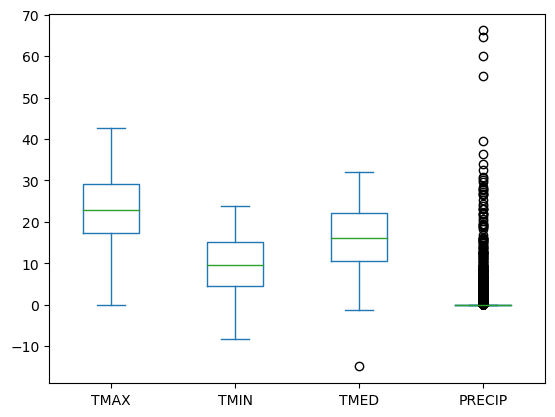

In [43]:
data.loc[:,'TMAX':'PRECIP'].plot.box()

In [53]:
group_daily = data.groupby(['month', data.index.day])
daily_agg = group_daily.agg({
    'TMED': 'mean',
    'TMAX': 'mean',
    'TMIN': 'mean',
    'PRECIP': 'mean',
})
daily_agg.head()

KeyError: 'month'

In [58]:
daily_agg.plot(y =['TMAX', 'TMIN', 'TMED'] )

NameError: name 'daily_agg' is not defined

In [ ]:
############################################

In [56]:
model = pd.read_csv(
    "data/model.txt",
    delim_whitespace = True,
    skiprows = 3,
    parse_dates = {'Timestamp':[0,1]},
    dayfirst = True,
    index_col = 'Timestamp',
)

In [57]:
model.head(5)

,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%)
Timestamp,,,,,,,
1984-01-01 00:00:00,20.8,243,7.3,1.25,1002.8,0.04,86.3
1984-01-01 01:00:00,20.8,243,7.3,1.25,1002.2,0.04,86.9
1984-01-01 02:00:00,20.6,243,7.4,1.24,1001.8,0.04,87.0
1984-01-01 03:00:00,20.4,244,7.5,1.24,1001.5,0.05,86.2
1984-01-01 04:00:00,20.3,245,7.5,1.24,1001.2,0.05,85.6


<AxesSubplot: ylabel='Frequency'>

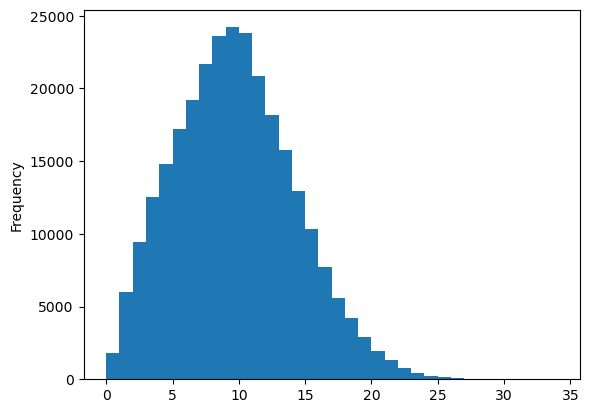

In [61]:
# Histograma de la velocidad del viento con 36 participantes
model.loc[:,'M(m/s)'].plot.hist(bins = np.arange(0,35))

In [64]:
# Historico de la velocidad media agrupado pora años y meses
model['month'] = model.index.month
model['year'] = model.index.year
model.groupby(by=['year', 'month']).mean().head(24)

M(m/s)      D(deg)       T(C)  De(k/m3)     PRE(hPa)  \
year month                                                            
1984 1      13.821505  233.603495   4.621505  1.247419   993.974328   
     2      10.043534  164.089080   3.522701  1.269368  1007.659339   
     3       8.708199  153.081989   4.138306  1.261425  1003.437231   
     4       7.939583  162.113889   6.781111  1.255986  1008.487083   
     5       8.283871  123.590054   8.034677  1.238763   998.939113   
     6       7.330833  231.652778  12.068194  1.228417  1005.009861   
     7       7.710618  222.166667  14.508199  1.219906  1006.686962   
     8       7.324194  147.930108  16.510484  1.210497  1006.095565   
     9       9.335694  231.116667  13.960000  1.210347   997.008889   
     10     10.985215  225.610215  12.109140  1.223790  1001.571505   
     11     10.789306  189.393056   9.877639  1.223389   993.419167   
     12      9.600941  213.807796   6.825000  1.253763  1006.855242   
1985 1      10.424059  157.752688   1.499059  1.269126  1000.074059   
     2       8.649851  150.980655   1.323512  1.283512  1010.598214   
     3       9.097043  190.330645   3.800000  1.259046  1000.441667   
     4      10.895833  217.081944   7.155694  1.242097   998.885694   
     5       9.147984  166.154570   9.715726  1.233145  1001.046371   
     6       8.583056  201.036111  11.734444  1.225500  1001.283194   
     7       8.865860  216.310484  15.546640  1.211720  1003.435484   
     8      10.379704  224.643817  14.996774  1.210685  1000.788306   
     9       8.181250  228.433333  14.561250  1.220333  1007.310000   
     10      8.021640  156.831989  12.262231  1.235470  1011.755645   
     11     10.734167  196.769444   5.608333  1.252042  1000.843611   
     12     12.567339  220.547043   7.274328  1.243387  1000.259409   

              RiNumber      RH(%)  
year month                         
1984 1       -2.823320  81.038575  
     2      -29.335790  83.860201  
     3        0.250726  84.740591  
     4       -1.655014  74.165417  
     5       -0.384704  87.813306  
     6       11.744944  81.090694  
     7        3.071788  78.730376  
     8        4.732742  79.204704  
     9       -6.703986  81.153889  
     10      -9.919731  83.965188  
     11    -183.106069  86.480694  
     12     -28.626452  87.389651  
1985 1      -21.708602  82.745430  
     2        1.706592  82.009226  
     3       -0.927110  87.532258  
     4       -5.238778  82.452083  
     5        6.960806  87.404570  
     6       -0.569833  82.841944  
     7        2.259113  80.224194  
     8        0.740094  80.920296  
     9       -2.072278  80.053889  
     10    -126.452137  82.420565  
     11     -18.886847  78.602639  
     12      -5.167849  88.165457

<AxesSubplot: xlabel='year,month'>

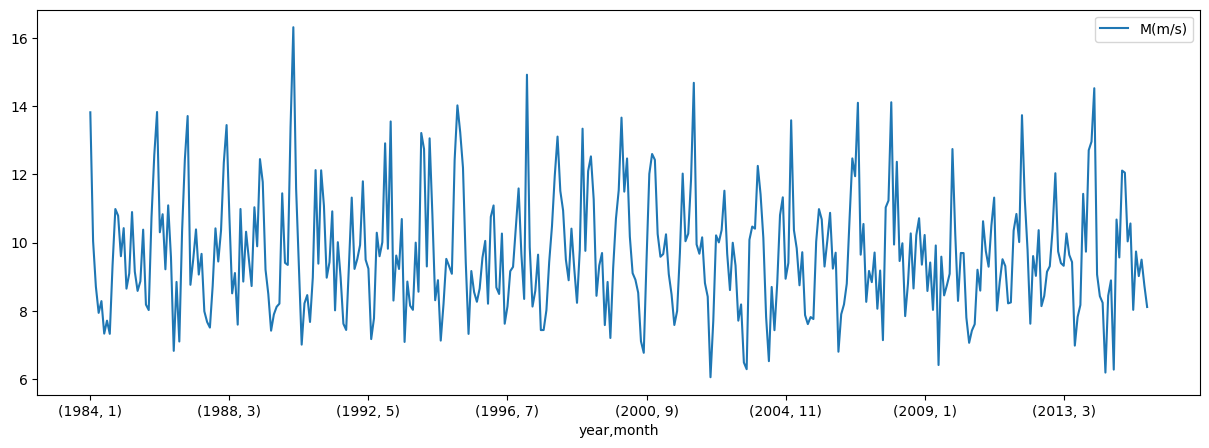

In [65]:
# Tabla con las velocidades medias en funcion del año filas
model.groupby(by = ['year','month']).mean().plot(y = "M(m/s)", figsize=(15,5))

In [67]:
 # grafica con los hitoricos de cada años agrupados por mes y superpuestos
monthly = model.groupby(by = ['year','month']).mean()
monthly['ma'] = monthly.loc[:,'M(m/s)'].rolling(5, center=True).mean()
monthly.head()

M(m/s)      D(deg)      T(C)  De(k/m3)     PRE(hPa)   RiNumber  \
year month                                                                      
1984 1      13.821505  233.603495  4.621505  1.247419   993.974328  -2.823320   
     2      10.043534  164.089080  3.522701  1.269368  1007.659339 -29.335790   
     3       8.708199  153.081989  4.138306  1.261425  1003.437231   0.250726   
     4       7.939583  162.113889  6.781111  1.255986  1008.487083  -1.655014   
     5       8.283871  123.590054  8.034677  1.238763   998.939113  -0.384704   

                RH(%)        ma  
year month                       
1984 1      81.038575       NaN  
     2      83.860201       NaN  
     3      84.740591  9.759339  
     4      74.165417  8.461204  
     5      87.813306  7.994621

In [69]:
monthly.loc[:,'M(m/s)'].reset_index().pivot(index = 'year', columns='month')

M(m/s)                                                         \
month         1          2          3          4          5          6    
year                                                                      
1984   13.821505  10.043534   8.708199   7.939583   8.283871   7.330833   
1985   10.424059   8.649851   9.097043  10.895833   9.147984   8.583056   
1986   13.830972  10.303423  10.832527   9.217222  11.092742   9.570000   
1987    8.762231   9.502530  10.386962   9.063056   9.670161   7.983889   
1988   12.345430  13.447557  10.783333   8.511806   9.107661   7.594167   
1989    9.891935  12.448958  11.776478   9.206944   8.491667   7.417083   
1990   13.390726  16.317262  11.582661   9.273889   7.007796   8.217778   
1991   11.082124   8.971131   9.425000  10.917083   8.013441  10.012361   
1992    9.519624   9.928879  11.797849   9.496667   9.234140   7.170139   
1993   13.553629   8.300298   9.620296   9.226944  10.691801   7.086528   
1994   12.743817   9.300446  13.058468  10.817361   8.309677   8.898056   
1995   14.024866  13.239137  12.197043   9.416944   7.321909   9.166389   
1996   10.754839  11.089511   8.685753   8.493611  10.265726   7.620417   
1997    8.347715  14.924107   9.867876   8.124444   8.584274   9.646667   
1998   13.109677  11.514286  10.942339   9.500417   8.895833  10.409583   
1999   12.528763  11.269048   8.439247   9.330000   9.694220   7.580694   
2000   11.494892  12.468247  10.172715   9.103472   8.910349   8.529167   
2001   10.253495   9.584673   9.664516  10.243333   9.074731   8.480000   
2002   11.843817  14.686756   9.946237   9.673611  10.154435   8.813611   
2003   11.521909   9.675744   8.608065   9.995833   9.328091   7.710972   
2004   12.250134  11.419828  10.138710   7.813889   6.522446   8.699167   
2005   13.587500  10.366071   9.831720   8.748194   9.718414   7.874444   
2006    9.297984  10.054167  10.873118   9.237639   9.704032   6.799444   
2007   14.101075   9.645387  10.546640   8.262500   9.168145   8.840694   
2008   14.116129   9.943103  12.370161   9.460139   9.980376   7.843889   
2009   10.223387   8.581101   9.415591   8.026250   9.916532   6.409583   
2010    8.289919   9.695387   9.692876   7.802083   7.061559   7.421528   
2011   10.500941  11.319940   8.006317   8.849028   9.512500   9.312500   
2012   11.287500   9.791810   7.621102   9.605000   9.024597  10.365000   
2013    9.740323   9.398512   9.320027  10.267222   9.640860   9.429167   
2014   12.961156  14.528125   9.064785   8.428750   8.235349   6.188056   
2015   12.050134  10.035863  10.561156   8.027083   9.739382   9.018056   

                                                                         
month         7          8          9          10         11         12  
year                                                                     
1984    7.710618   7.324194   9.335694  10.985215  10.789306   9.600941  
1985    8.865860  10.379704   8.181250   8.021640  10.734167  12.567339  
1986    6.824866   8.847043   7.099028  10.331855  12.446944  13.712500  
1987    7.672312   7.507796   8.731528  10.418011   9.445417  10.355376  
1988   10.986022   8.857124  10.319167   9.518683   8.726111  11.036559  
1989    7.892876   8.117876   8.210139  11.445430   9.406389   9.345430  
1990    8.460618   7.672581   8.973333  12.126210   9.382361  12.120161  
1991    8.981317   7.620565   7.437778   9.339382  11.320278   9.228898  
1992    7.781048  10.290054   9.600278  10.010215  12.911806   9.820027  
1993    8.857527   8.148925   8.027778   9.998925   8.559306  13.214651  
1994    7.125806   8.196505   9.523194   9.311290   9.085000  12.423925  
1995    8.548118   8.264382   8.653056   9.555376  10.049861   8.207661  
1996    8.129167   9.162634   9.287639  10.456048  11.589306   9.658468  
1997    7.433871   7.436156   8.018889   9.434005  10.480139  11.958468  
1998    9.251882   8.233871   9.785556  13.341532   9.758194  12.096640  
1999    8.846640   7.202285   9.258333  10.698253  1

<AxesSubplot: xlabel='month'>

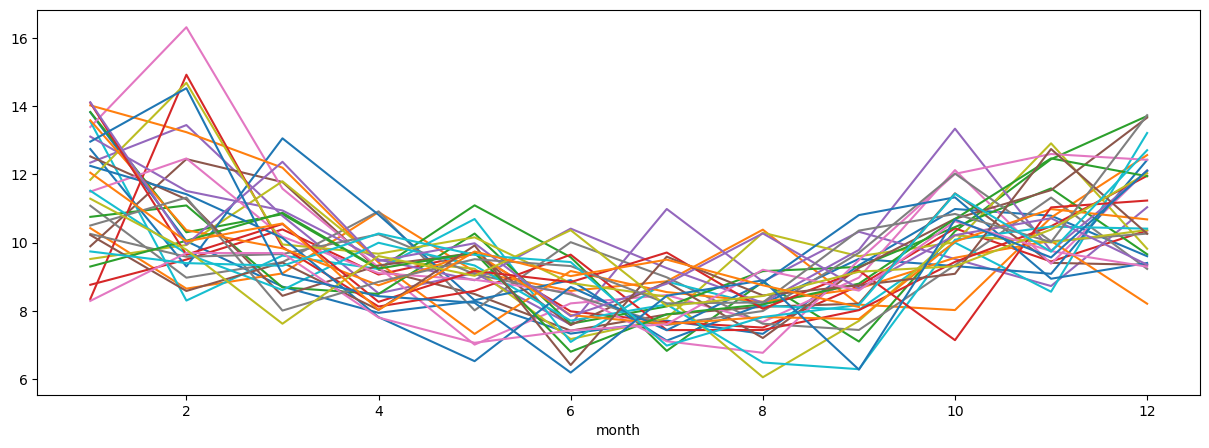

In [78]:
monthly.loc[:,'M(m/s)'].reset_index().pivot(index = 'year', columns='month').T.loc['M(m/s)'].plot(figsize=(15,5), legend=False)